In [332]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


url_list = ['https://fbref.com/en/squads/19538871/Manchester-United-Stats', 
            'https://fbref.com/en/squads/822bd0ba/Liverpool-Stats',
            'https://fbref.com/en/squads/b8fd03ef/Manchester-City-Stats',
            'https://fbref.com/en/squads/18bb7c10/Arsenal-Stats',
            'https://fbref.com/en/squads/361ca564/Tottenham-Hotspur-Stats',
            'https://fbref.com/en/squads/cff3d9bb/Chelsea-Stats']
a=0

for url in url_list:
    url_info = requests.get(url)
    matches = pd.read_html(url_info.text, match ='Standard Stats')[0]
    a = a+1
    matches.to_csv(f'{a}.csv')
    matches
    
    

In [497]:
import matplotlib.pyplot as plt
players_df = pd.DataFrame()

for a in range(1, 7):
    
    initial_list = pd.read_csv(f'{a}.csv')
    initial_columns = initial_list.iloc[0]
    initial_list.columns = initial_columns
    final_list = initial_list[1:-2]
    players_df = pd.concat([players_df, final_list])

#A big dataframe is now extracted from the website
players_df.reset_index()
players_df.to_csv('final_df.csv')
players_df.columns

Index([       nan,   'Player',   'Nation',      'Pos',      'Age',       'MP',
         'Starts',      'Min',      '90s',      'Gls',      'Ast',      'G+A',
           'G-PK',       'PK',    'PKatt',     'CrdY',     'CrdR',       'xG',
           'npxG',      'xAG', 'npxG+xAG',     'PrgC',     'PrgP',     'PrgR',
            'Gls',      'Ast',      'G+A',     'G-PK',   'G+A-PK',       'xG',
            'xAG',   'xG+xAG',     'npxG', 'npxG+xAG',  'Matches'],
      dtype='object', name=0)

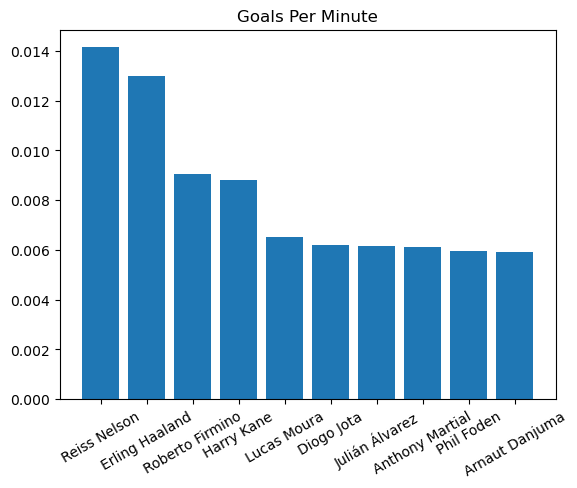

              Player     Min   Gls    MPG
125     Reiss Nelson   212.0   3.0   71.0
74    Erling Haaland  2769.0  36.0   77.0
50   Roberto Firmino  1213.0  11.0  110.0
139       Harry Kane  3405.0  30.0  114.0
163      Lucas Moura   153.0   1.0  153.0
51        Diogo Jota  1131.0   7.0  162.0
87    Julián Álvarez  1465.0   9.0  163.0
15   Anthony Martial   978.0   6.0  163.0
84        Phil Foden  1842.0  11.0  167.0
162   Arnaut Danjuma   169.0   1.0  169.0


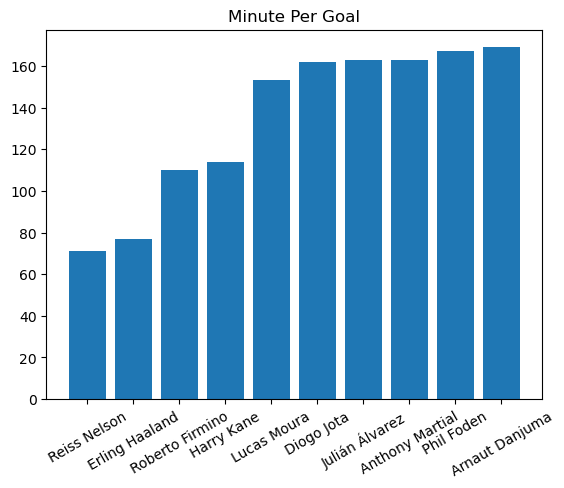

<Figure size 640x480 with 0 Axes>

In [515]:
#Goals per minute
gpm_df = pd.read_csv('final_df.csv')
gpm_df = gpm_df[['Player', 'Gls', 'Min']]

#For goals per minute
gpm_df['GPM'] = gpm_df['Gls']/gpm_df['Min']
gpm_df = gpm_df.sort_values(['GPM'], ascending=False)
gpm_df = gpm_df[0:10]
gpm_df

plt.bar(gpm_df['Player'],gpm_df['GPM'])
plt.xticks(rotation=30)
plt.title('Goals Per Minute')
plt.show()
plt.clf()

#For minutes per goal
mpg_df = pd.read_csv('final_df.csv')
mpg_df = mpg_df[['Player', 'Min', 'Gls']]
mpg_df = mpg_df.dropna(subset=['Min', 'Gls'])

mpg_df = mpg_df[mpg_df.Gls != 0.0]
mpg_df['MPG'] = round(mpg_df['Min']/mpg_df['Gls'],0)
mpg_df = mpg_df.sort_values(['MPG'], ascending=True)[0:10]
print(mpg_df)

plt.bar(mpg_df['Player'],mpg_df['MPG'])
plt.xticks(rotation=30)
plt.title('Minute Per Goal')
plt.show()
plt.clf()



                 Player   Nation    Pos   Age   Gls
74       Erling Haaland   no NOR     FW  22.0  36.0
139          Harry Kane  eng ENG     FW  29.0  30.0
38        Mohamed Salah   eg EGY     FW  30.0  19.0
2       Marcus Rashford  eng ENG     FW  24.0  17.0
107     Martin Ødegaard   no NOR     MF  23.0  15.0
..                  ...      ...    ...   ...   ...
207       Billy Gilmour  sct SCO     MF  21.0   NaN
208  Callum Hudson-Odoi  eng ENG  FW,MF  21.0   NaN
209    Bashir Humphreys  eng ENG     DF  19.0   NaN
210         Harvey Vale  eng ENG     MF  18.0   NaN
211          Ethan Wady  eng ENG     GK  20.0   NaN

[212 rows x 5 columns]


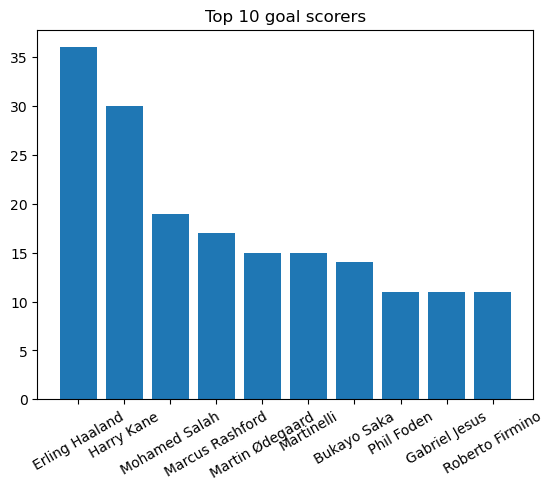

<Figure size 640x480 with 0 Axes>

In [516]:


#Now using it for whatever is required
goalscored_df = players_df[['Player', 'Nation', 'Pos', 'Age', 'Gls']]

#Save it as a csv and try to remove index GLS
goalscored_df.to_csv('goalsscored.csv')

gs_df = pd.read_csv('goalsscored.csv')
gs_final = gs_df[['Player','Nation','Pos','Age','Gls']]
gs_final = gs_final.sort_values(['Gls'], ascending=False)
top_10gs = gs_final[0:10]

plt.bar(top_10gs['Player'], top_10gs['Gls'])
plt.title('Top 10 goal scorers')
plt.xticks(rotation=30)
plt.show()
plt.clf()


                     Player   Nation    Pos   Ast
75          Kevin De Bruyne   be BEL     MF  16.0
38            Mohamed Salah   eg EGY     FW  12.0
106             Bukayo Saka  eng ENG     FW  11.0
115        Leandro Trossard   be BEL     FW  10.0
82             Riyad Mahrez   dz ALG  FW,MF  10.0
39   Trent Alexander-Arnold  eng ENG     DF   9.0
1           Bruno Fernandes   pt POR  MF,FW   8.0
42         Andrew Robertson  sct SCO     DF   8.0
74           Erling Haaland   no NOR     FW   8.0
4         Christian Eriksen   dk DEN     MF   8.0


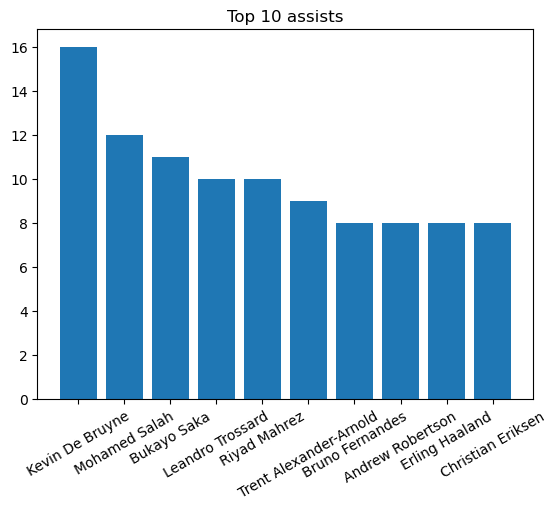

<Figure size 640x480 with 0 Axes>

In [453]:
#Assist
as_final = pd.read_csv('final_df.csv')
as_final = as_final[['Player','Nation', 'Pos','Ast']]
as_final = as_final.sort_values(['Ast'], ascending=False)
as_final
top_10as = as_final[0:10]

print(top_10as)

plt.bar(top_10as['Player'], top_10as['Ast'])
plt.title('Top 10 assists')
plt.xticks(rotation=30)
plt.show()
plt.clf()


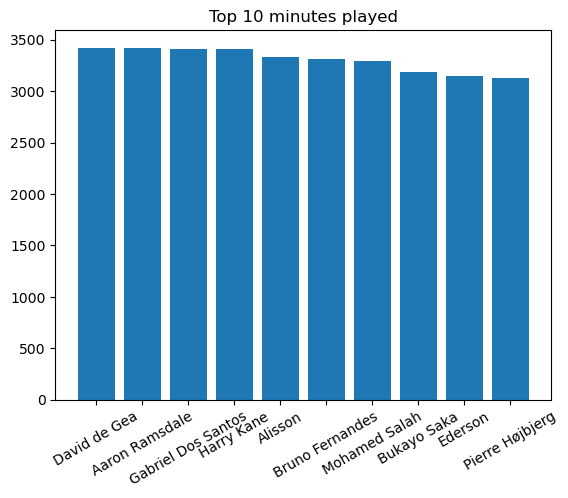

<Figure size 640x480 with 0 Axes>

In [467]:
#Most Minutes played
min_final = pd.read_csv('final_df.csv')
min_final = min_final[['Player','Nation','Pos', 'Min']].sort_values(['Min'], ascending=False)
min_final = min_final[0:10]

plt.bar(min_final['Player'], min_final['Min'])
plt.title('Top 10 minutes played')
plt.xticks(rotation=30)
plt.show()
plt.clf()


In [531]:
#Goals and Assist
ga_merge = pd.merge(gs_final, as_final, on='Player', how='inner')
ga_merge = ga_merge[['Player','Nation_x','Pos_x','Age','Gls','Ast']]
ga_merge = ga_merge.dropna()
ga_merge['GA'] = ga_merge['Gls'] + ga_merge['Ast']
ga_merge = ga_merge.sort_values(['GA'], ascending=False)[0:20]
ga_merge



,Player,Nation_x,Pos_x,Age,Gls,Ast,GA
0,Erling Haaland,no NOR,FW,22.0,36.0,8.0,44.0
1,Harry Kane,eng ENG,FW,29.0,30.0,3.0,33.0
2,Mohamed Salah,eg EGY,FW,30.0,19.0,12.0,31.0
6,Bukayo Saka,eng ENG,FW,20.0,14.0,11.0,25.0
15,Kevin De Bruyne,be BEL,MF,31.0,7.0,16.0,23.0
3,Marcus Rashford,eng ENG,FW,24.0,17.0,5.0,22.0
4,Martin Ødegaard,no NOR,MF,23.0,15.0,7.0,22.0
5,Martinelli,br BRA,FW,21.0,15.0,5.0,20.0
7,Phil Foden,eng ENG,FW,22.0,11.0,6.0,17.0
8,Gabriel Jesus,br BRA,FW,25.0,11.0,6.0,17.0
